In [21]:
import numpy as np
from mc_utils import generate_episode

def first_visit_monte_carlo(env, policy=None, gamma=1.0, num_episodes=5_000):
    # Initialize the value function randomly.
    V = {state: np.random.rand() for state in env.state_space}

    # Initialize the Reward variable with empty lists for each state.
    rewards = {state: [] for state in env.state_space}

    for _ in range(num_episodes):
        episode = []

        # Generate an episode using the given policy.
        state = env.reset()
        action = policy[state] if policy else env.action_space.sample()
        next_state, reward, terminated  = env.step(action)
        episode.append((state, action, reward))
        while not terminated:
            state = next_state
            action = policy[state] if policy else env.action_space.sample()
            next_state, reward, terminated = env.step(action)
            episode.append((state, action, reward))


        # Initialize the expected return.
        G = 0.0

        for t in range(len(episode) - 1, -1, -1):
            state, action, reward = episode[t]
            G = gamma*G + reward
            if state not in [x[0] for x in episode[:t]]:
                rewards[state].append(G)
                V[state] = np.mean(rewards[state])
    return V


In [22]:
from custom_classes import CustomBlackjackEnv

env = CustomBlackjackEnv()

# Compute the value function for the random policy.
V = first_visit_monte_carlo(env, num_episodes=5_000)

# Print the value function for the random policy.
print("--------------- Value Function for Random Policy ----------------")
i = 0
for state, value in V.items():
    if i < 10:
        print(f"V[{state}] = {V[state]}")
    else:
        break
    i += 1

--------------- Value Function for Random Policy ----------------
V[(4, 1, False)] = -1.0
V[(4, 1, True)] = 0.20504226791268176
V[(4, 2, False)] = -1.0
V[(4, 2, True)] = 0.38553230182751386
V[(4, 3, False)] = -1.0
V[(4, 3, True)] = 0.6846312817928084
V[(4, 4, False)] = -1.0
V[(4, 4, True)] = 0.5581629799291327
V[(4, 5, False)] = -0.3333333333333333
V[(4, 5, True)] = 0.04365206719775483


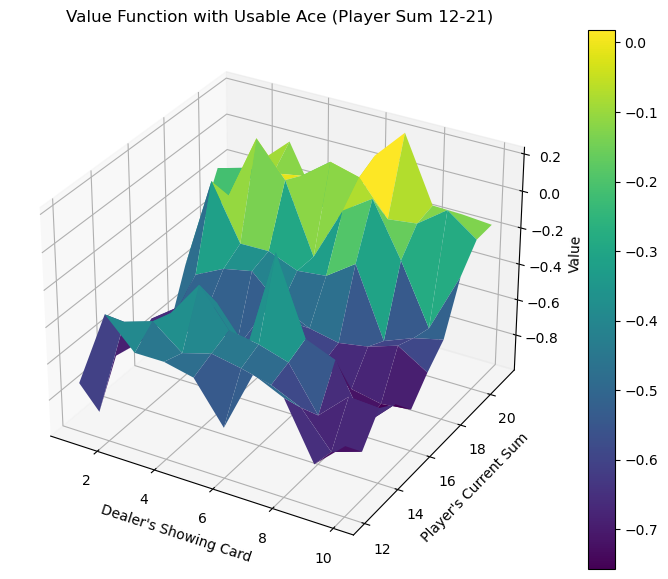

In [23]:
from mc_utils import plot_value_function
# Plot for states without a usable ace, with axes switched
plot_value_function(V, 0, 'Value Function with Usable Ace (Player Sum 12-21)')

In [24]:
from mc_utils import plot_value_function

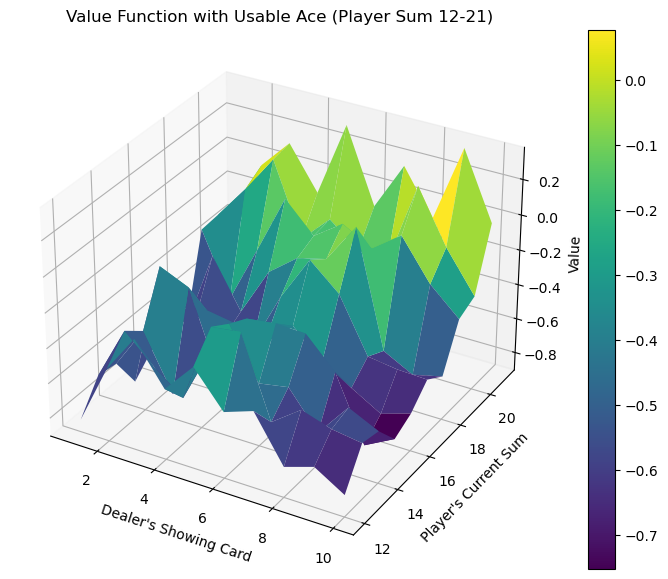

In [5]:
# Plot for states with a usable ace, with axes switched
plot_value_function(V, 0, 'Value Function with Usable Ace (Player Sum 12-21)')

In [25]:
# Sutton & Barto BlackJack policy from the Monte Carlo Chapter.
# sab_policy = {state: int(state[0] < 20) for state in env.state_space}
sab_policy = {state : int(state[0] < 20) for state in env.state_space}

# Compute the value function for the Sutton & Barto policy.
V = first_visit_monte_carlo(env, sab_policy)

# Print the value function for the Sutton & Barto policy.
print("------------- Value Function for Sutton & Barto Policy ----------------")
i = 0
for state, value in V.items():
    if i < 10:
        print(f"V[{state}] = {V[state]}")
    else:
        break
    i += 1

------------- Value Function for Sutton & Barto Policy ----------------
V[(4, 1, False)] = -1.0
V[(4, 1, True)] = 0.14155239979259304
V[(4, 2, False)] = -1.0
V[(4, 2, True)] = 0.8141635501798424
V[(4, 3, False)] = 1.0
V[(4, 3, True)] = 0.48662834246754305
V[(4, 4, False)] = -1.0
V[(4, 4, True)] = 0.2833989081918564
V[(4, 5, False)] = -0.5
V[(4, 5, True)] = 0.2919752744168961


In [26]:
# Compute the value function for the Sutton & Barto policy with 500_000 iterations.
# Note, this will take a few minutes..... Using Chapter 2 for inspiration, can you make this faster?
V = first_visit_monte_carlo(env, sab_policy, num_episodes=30_000)

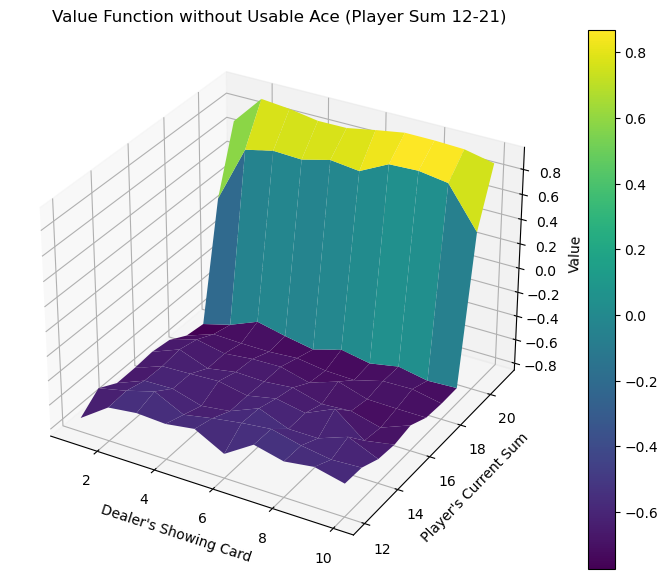

In [27]:
# Plot for states without a usable ace.
plot_value_function(V, 0, 'Value Function without Usable Ace (Player Sum 12-21)')

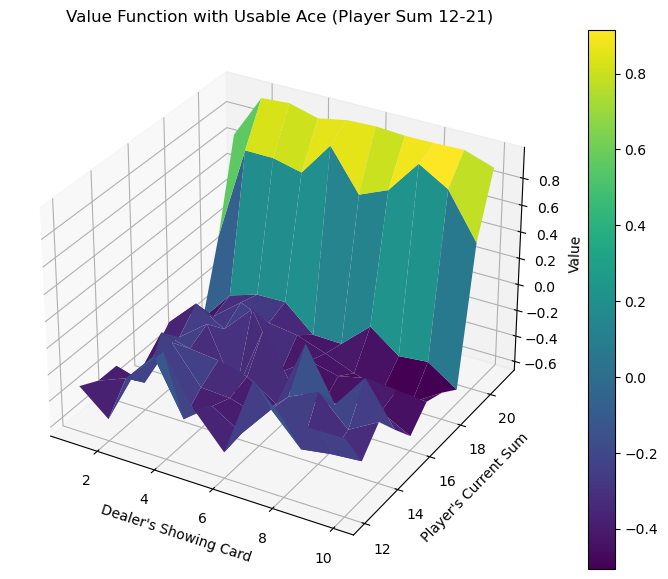

In [28]:
# Plot for states with a usable ace.
plot_value_function(V, 1, 'Value Function with Usable Ace (Player Sum 12-21)')